In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
#Connecting to the database named as "fananalytics"
import pymysql
pymysql.install_as_MySQLdb()
# Open database connection
db = pymysql.connect (host="localhost",port=3306,user="root",\
                      passwd="",db="fananalytics")

In [3]:
#loading innings table from mysql to csv format using python
query = 'select * from innings'
innings = pd.read_sql_query(query, db)
innings.to_csv("innings.csv")

In [4]:
#loading matches table from mysql to csv format using python
query = 'select * from matches'
matches = pd.read_sql_query(query, db)
matches.to_csv("matches.csv")

In [5]:
# matches = pd.read_csv('matches.csv')
# innings = pd.read_csv('innings.csv')
import re
matches.replace('', np.nan, regex=True,inplace=True)
innings.replace('', np.nan, regex=True,inplace=True)

innings['runs_off_bat']=innings['runs_off_bat'].astype(float)
innings['Extras']=innings['Extras'].astype(float)

# matches['runs_off_bat']=matches['runs_off_bat'].astype(float)
# matches['Extras']=matches['Extras'].astype(float)

In [6]:
matches.head()

,0,Unnamed: 0,winner_wickets,umpire3,team,team2,gender,season,date,competition,...,reserve_umpire,tv_umpire,match_referee,winner,winner_runs,outcome,eliminator,date2,neutralvenue,id
0,0,0,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore,male,2017,2017/04/05,Indian Premier League,...,N Pandit,A Deshmukh,J Srinath,Sunrisers Hyderabad,35.0,NaN,NaN,NaN,NaN,0\r
1,1,1,7.0,NaN,Rising Pune Supergiant,Mumbai Indians,male,2017,2017/04/06,Indian Premier League,...,Navdeep Singh,VK Sharma,M Nayyar,Rising Pune Supergiant,NaN,NaN,NaN,NaN,NaN,1\r
2,2,2,10.0,NaN,Gujarat Lions,Kolkata Knight Riders,male,2017,2017/04/07,Indian Premier League,...,K Srinivasan,YC Barde,V Narayan Kutty,Kolkata Knight Riders,NaN,NaN,NaN,NaN,NaN,2\r
3,3,3,6.0,NaN,Kings XI Punjab,Rising Pune Supergiant,male,2017,2017/04/08,Indian Premier League,...,R Pandit,KN Ananthapadmanabhan,Chinmay Sharma,Kings XI Punjab,NaN,NaN,NaN,NaN,NaN,3\r
4,4,4,NaN,NaN,Royal Challengers Bangalore,Delhi Daredevils,male,2017,2017/04/08,Indian Premier League,...,Navdeep Singh,A Nand Kishore,J Srinath,Royal Challengers Bangalore,15.0,NaN,NaN,NaN,NaN,4\r


In [7]:
matches.drop(['Unnamed: 0','0'],axis=1,inplace=True)

In [8]:
innings.head()

,0,inning,over,batting_team_name,batsman,non_striker,bowler,runs_off_bat,Extras,Kind of wicket,Dismissed player,match_id
0,0,1,0.1,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0.0,0.0,NaN,NaN,1\r
1,1,1,0.2,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0.0,0.0,NaN,NaN,1\r
2,2,1,0.3,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,4.0,0.0,NaN,NaN,1\r
3,3,1,0.4,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0.0,0.0,NaN,NaN,1\r
4,4,1,0.5,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0.0,2.0,NaN,NaN,1\r


In [9]:
innings.drop(['0'],axis=1,inplace=True)

In [10]:
innings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150140 entries, 0 to 150139
Data columns (total 11 columns):
inning               150140 non-null object
over                 150140 non-null object
batting_team_name    150140 non-null object
batsman              150140 non-null object
non_striker          150140 non-null object
bowler               150140 non-null object
runs_off_bat         150140 non-null float64
Extras               150140 non-null float64
Kind of wicket       7435 non-null object
Dismissed player     7435 non-null object
match_id             150140 non-null object
dtypes: float64(2), object(9)
memory usage: 12.6+ MB


In [11]:
innings.fillna(0,inplace=True)     #filling all the NaN values with 0

In [12]:
innings['match_id']=innings['match_id'].astype(int)
innings.head()

,inning,over,batting_team_name,batsman,non_striker,bowler,runs_off_bat,Extras,Kind of wicket,Dismissed player,match_id
0,1,0.1,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0.0,0.0,0,0,1
1,1,0.2,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0.0,0.0,0,0,1
2,1,0.3,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,4.0,0.0,0,0,1
3,1,0.4,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0.0,0.0,0,0,1
4,1,0.5,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0.0,2.0,0,0,1


In [13]:
matches['id']=matches['id'].astype(int)
matches.head()

,winner_wickets,umpire3,team,team2,gender,season,date,competition,match_number,venue,...,reserve_umpire,tv_umpire,match_referee,winner,winner_runs,outcome,eliminator,date2,neutralvenue,id
0,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore,male,2017,2017/04/05,Indian Premier League,1.0,"Rajiv Gandhi International Stadium, Uppal",...,N Pandit,A Deshmukh,J Srinath,Sunrisers Hyderabad,35.0,NaN,NaN,NaN,NaN,0
1,7.0,NaN,Rising Pune Supergiant,Mumbai Indians,male,2017,2017/04/06,Indian Premier League,2.0,Maharashtra Cricket Association Stadium,...,Navdeep Singh,VK Sharma,M Nayyar,Rising Pune Supergiant,NaN,NaN,NaN,NaN,NaN,1
2,10.0,NaN,Gujarat Lions,Kolkata Knight Riders,male,2017,2017/04/07,Indian Premier League,3.0,Saurashtra Cricket Association Stadium,...,K Srinivasan,YC Barde,V Narayan Kutty,Kolkata Knight Riders,NaN,NaN,NaN,NaN,NaN,2
3,6.0,NaN,Kings XI Punjab,Rising Pune Supergiant,male,2017,2017/04/08,Indian Premier League,4.0,Holkar Cricket Stadium,...,R Pandit,KN Ananthapadmanabhan,Chinmay Sharma,Kings XI Punjab,NaN,NaN,NaN,NaN,NaN,3
4,NaN,NaN,Royal Challengers Bangalore,Delhi Daredevils,male,2017,2017/04/08,Indian Premier League,5.0,M Chinnaswamy Stadium,...,Navdeep Singh,A Nand Kishore,J Srinath,Royal Challengers Bangalore,15.0,NaN,NaN,NaN,NaN,4


In [14]:
batsmen = matches[['id','season']].merge(innings, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

In [15]:
batsmen.drop([0],inplace=True)

In [16]:
batsmen.head()

,season,inning,over,batting_team_name,batsman,non_striker,bowler,runs_off_bat,Extras,Kind of wicket,Dismissed player,match_id
1,2017,1,0.1,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0.0,0.0,0,0,1.0
2,2017,1,0.2,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0.0,0.0,0,0,1.0
3,2017,1,0.3,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,4.0,0.0,0,0,1.0
4,2017,1,0.4,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0.0,0.0,0,0,1.0
5,2017,1,0.5,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0.0,2.0,0,0,1.0


In [17]:
# batsmen['runs_off_bat']=batsmen['runs_off_bat'].astype(float)
# batsmen['Extras']=batsmen['Extras'].astype(float)

In [18]:
batsmen['total_runs']=batsmen['runs_off_bat']+batsmen['Extras']

In [19]:
# batsmen['total_runs']

## Total Runs Across the seasons

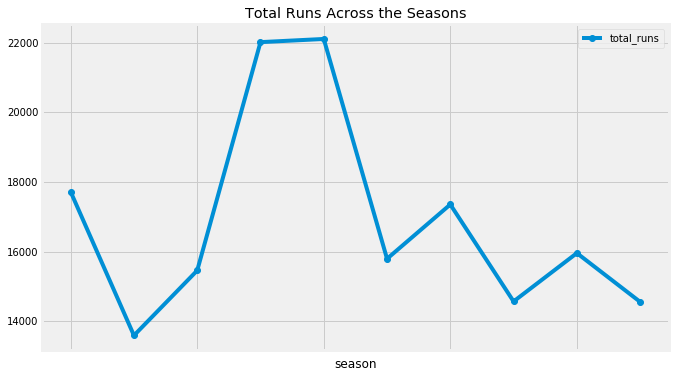

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.plot(x='season',y='total_runs',marker='o')
plt.gcf().set_size_inches(10,6)
plt.title('Total Runs Across the Seasons')
plt.show()

In [21]:
season

,season,total_runs
0,2007/08,17720.0
1,2009,13596.0
2,2009/10,15462.0
3,2011,22018.0
4,2012,22109.0
5,2013,15798.0
6,2014,17357.0
7,2015,14573.0
8,2016,15961.0
9,2017,14561.0


## Average Runs per match across seasons 

Text(0.5, 1.0, 'Average Runs per match across Seasons')

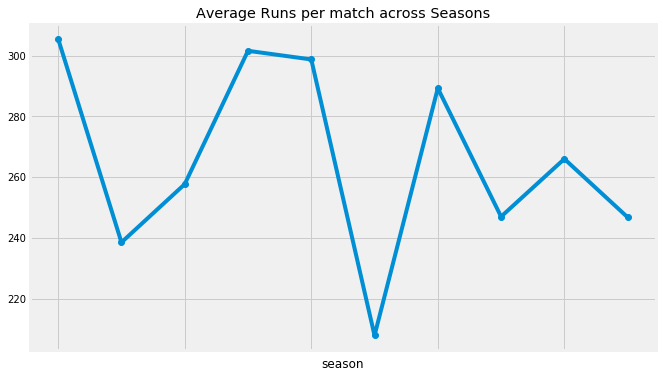

In [22]:
avgruns_each_season=matches.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
plt.gcf().set_size_inches(10,6)
plt.title('Average Runs per match across Seasons')


## Final Score distribution of teams across innings

In [23]:
innings['runs_off_bat']=innings['runs_off_bat'].astype(float)
innings['Extras']=innings['Extras'].astype(float)
innings['total_runs']=innings['runs_off_bat']+innings['Extras']
x=innings.groupby(['match_id','inning','batting_team_name'])['total_runs'].sum().reset_index()

In [24]:
x.head()

,match_id,inning,batting_team_name,total_runs
0,1,1,Sunrisers Hyderabad,207.0
1,1,2,Royal Challengers Bangalore,172.0
2,2,1,Mumbai Indians,184.0
3,2,2,Rising Pune Supergiant,181.0
4,2,2,Royal Challengers Bangalore,0.0


In [25]:
#x=x.groupby(['inning','batting_team_name'])['total_runs'].sum().reset_index()

In [26]:
x.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [27]:
score_1st=x[x['inning']=='1']
score_2nd=x[x['inning']=='2']

Text(0.5, 1.0, '1st Innings')

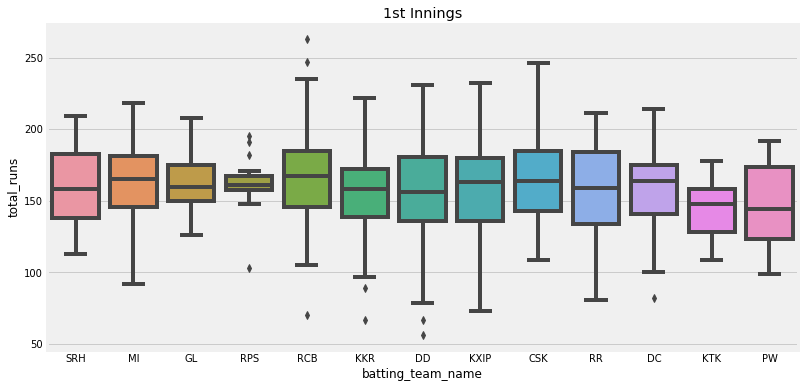

In [28]:
plt.subplots(figsize=(12,6))
sns.boxplot(x='batting_team_name',y='total_runs',data=score_1st).set_title('1st Innings')
# fig=plt.gcf()
# fig.set_size_inches(50,40)

Text(0.5, 1.0, '2nd Innings')

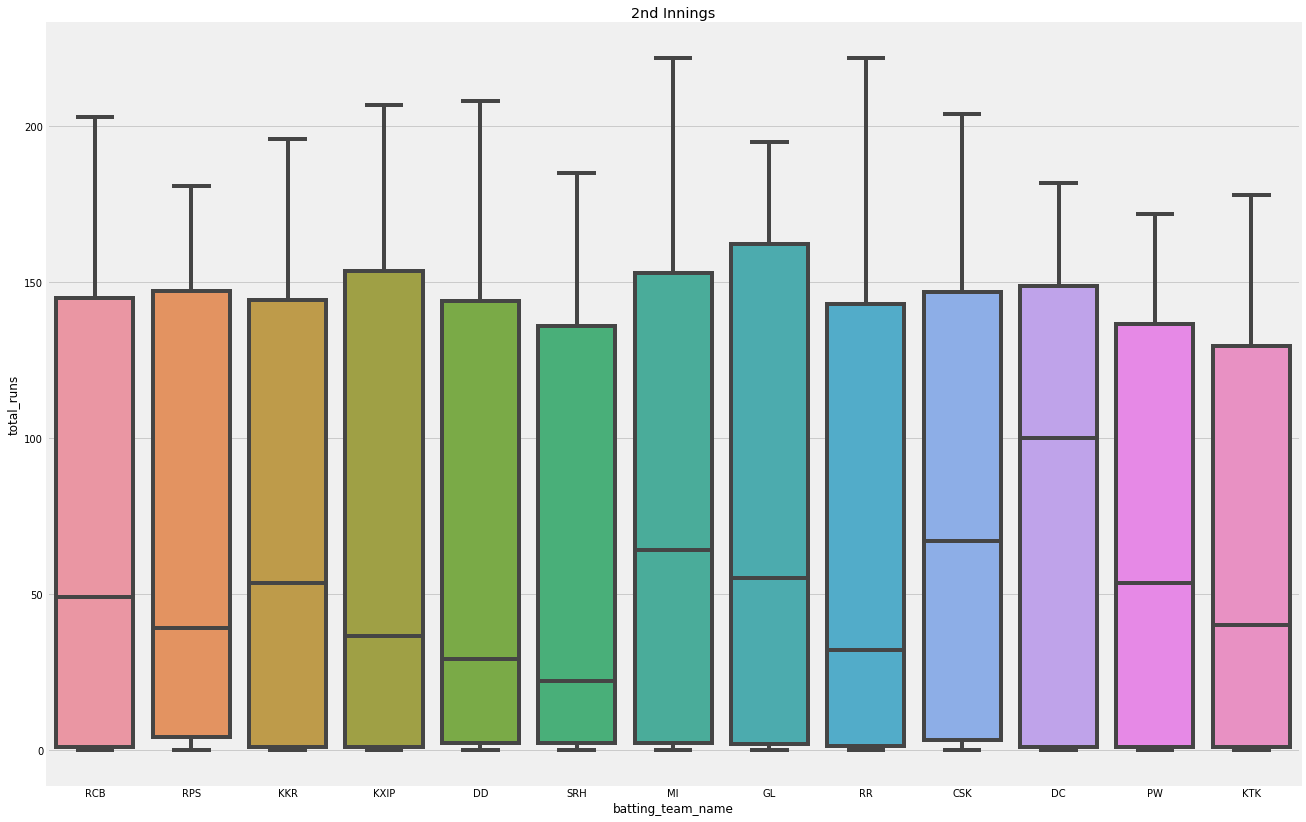

In [29]:
plt.subplots(figsize=(20,14))
sns.boxplot(x='batting_team_name',y='total_runs',data=score_2nd).set_title('2nd Innings')
# fig=plt.gcf()
# fig.set_size_inches(50,40)

## Teams scoring greater than 220 runs in an inning 

In [30]:
high_scores=innings.groupby(['match_id', 'inning','batting_team_name'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores_220=high_scores[high_scores['total_runs']>=220]

In [31]:
high_scores_220.drop(['match_id','inning'],axis=1)

,batting_team_name,total_runs
159,Kings XI Punjab,230.0
161,Mumbai Indians,222.0
189,Kolkata Knight Riders,222.0
192,Chennai Super Kings,240.0
300,Kings XI Punjab,221.0
644,Chennai Super Kings,246.0
645,Rajasthan Royals,222.0
803,Delhi Daredevils,231.0
914,Kings XI Punjab,232.0
1163,Chennai Super Kings,222.0


## Teams scoring less than 1 run in an inning 

In [32]:
low_scores=innings.groupby(['match_id', 'inning','batting_team_name'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
low_scores_50=low_scores[low_scores['total_runs']<=1]

In [33]:
low_scores_50.drop(['match_id','inning'],axis=1)

,batting_team_name,total_runs
4,Royal Challengers Bangalore,0.0
13,Kings XI Punjab,1.0
15,Delhi Daredevils,1.0
28,Rising Pune Supergiant,0.0
31,Mumbai Indians,1.0
43,Sunrisers Hyderabad,1.0
45,Kings XI Punjab,0.0
52,Royal Challengers Bangalore,0.0
58,Kings XI Punjab,0.0
61,Gujarat Lions,0.0


## Highest run scorers in IPL

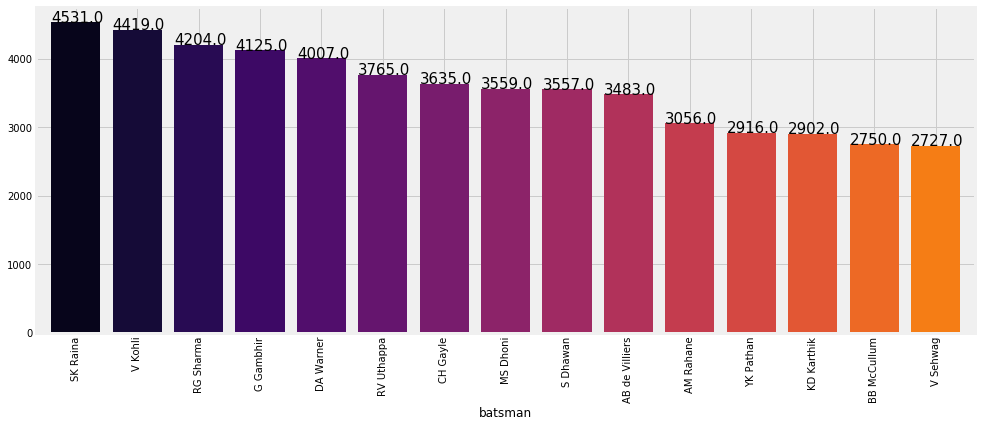

In [34]:
plt.subplots(figsize=(15,6))
max_runs=innings.groupby(['batsman'])['runs_off_bat'].sum()
ax=max_runs.sort_values(ascending=False)[:15].plot.bar(width=0.8,color=sns.color_palette('inferno',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()),fontsize=15)
plt.show()

## Topscorers in IPL in an inning

In [35]:
top_scores = innings.groupby(["match_id", "batsman","batting_team_name"])["runs_off_bat"].sum().reset_index()
top_scores.nlargest(10,'runs_off_bat')

,match_id,batsman,batting_team_name,runs_off_bat
6623,468,CH Gayle,Royal Challengers Bangalore,175.0
967,73,BB McCullum,Kolkata Knight Riders,158.0
9005,641,AB de Villiers,Royal Challengers Bangalore,133.0
9886,699,AB de Villiers,Royal Challengers Bangalore,129.0
5950,404,CH Gayle,Royal Challengers Bangalore,128.0
3351,239,M Vijay,Chennai Super Kings,127.0
574,49,DA Warner,Sunrisers Hyderabad,126.0
8280,585,V Sehwag,Kings XI Punjab,122.0
3935,276,PC Valthaty,Kings XI Punjab,120.0
4505,312,V Sehwag,Delhi Daredevils,119.0


## Bowlers who balled maximum number of overs

In [36]:
mo=innings.groupby(['bowler']).sum()
mo['total balls']=innings['bowler'].value_counts()
mo['overs']=(mo['total balls']//6)
mo[mo['overs']>150].sort_values(by='overs',ascending=0)['overs'].head(5).reset_index()

,bowler,overs
0,Harbhajan Singh,497
1,A Mishra,449
2,SL Malinga,446
3,P Kumar,436
4,PP Chawla,431
